In [ ]:
#!pip install datasets
from datasets import list_datasets

all_datasets  = list_datasets()
print(len(all_datasets))
print(all_datasets[:-10])

In [7]:
from datasets import load_dataset

emotions = load_dataset("emotion")
emotions

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [10]:
train_ds = emotions["train"]
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

In [14]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


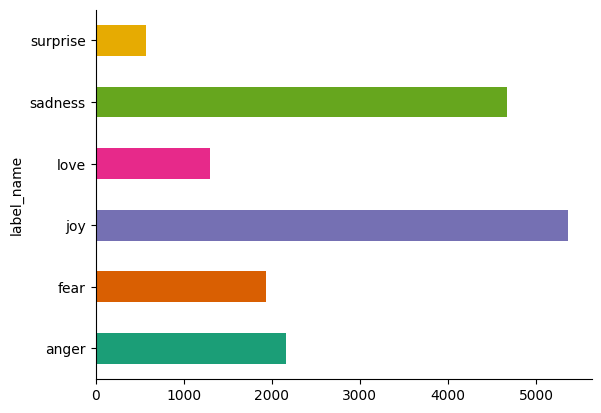

In [15]:
# @title label_name

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
emotions.reset_format()
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [19]:
text = "Charachter Tokenizing is important for NLPS"
tokenized_text = list(text)
print(tokenized_text)

['C', 'h', 'a', 'r', 'a', 'c', 'h', 't', 'e', 'r', ' ', 'T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 'i', 's', ' ', 'i', 'm', 'p', 'o', 'r', 't', 'a', 'n', 't', ' ', 'f', 'o', 'r', ' ', 'N', 'L', 'P', 'S']


In [21]:
token2idx = {ch:idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, 'C': 1, 'L': 2, 'N': 3, 'P': 4, 'S': 5, 'T': 6, 'a': 7, 'c': 8, 'e': 9, 'f': 10, 'g': 11, 'h': 12, 'i': 13, 'k': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'r': 19, 's': 20, 't': 21, 'z': 22}


In [24]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[1, 12, 7, 19, 7, 8, 12, 21, 9, 19, 0, 6, 17, 14, 9, 16, 13, 22, 13, 16, 11, 0, 13, 20, 0, 13, 15, 18, 17, 19, 21, 7, 16, 21, 0, 10, 17, 19, 0, 3, 2, 4, 5]


In [27]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encoding = F.one_hot(input_ids,num_classes = len(token2idx))
one_hot_encoding.shape

<ipython-input-27-b26488001c29>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids)


torch.Size([43, 23])

In [31]:
tokenized_text = text.split()
print(tokenized_text)

input_ids = torch.tensor([i for i in range(len(tokenized_text))])
one_hot_encoding = F.one_hot(input_ids)
one_hot_encoding

['Charachter', 'Tokenizing', 'is', 'important', 'for', 'NLPS']


tensor([[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]])

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [34]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
distilbert_tokenizer

DistilBertTokenizer(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [36]:
encoded_text = distilbert_tokenizer(text)
encoded_text

{'input_ids': [101, 25869, 6776, 3334, 19204, 6026, 2003, 2590, 2005, 17953, 4523, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [38]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'char', '##ach', '##ter', 'token', '##izing', 'is', 'important', 'for', 'nl', '##ps', '[SEP]']


In [44]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
  return tokenizer(batch["text"],padding=True,truncation=True)

print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [46]:
emotions_encoded = emotions.map(tokenize,batched=True,batch_size=None)
emotions_encoded

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
# pg 36